# Verifications with varying ensemble sizes

In [1]:
import os
import sys
import time
import h5py
import numpy as np
from glob import glob
from datetime import datetime, timedelta

In [2]:
sys.path.insert(0, '/glade/u/home/ksha/GAN_proj/')
sys.path.insert(0, '/glade/u/home/ksha/GAN_proj/libs/')

from namelist import *
import data_utils as du
import verif_utils as vu
import graph_utils as gu

In [3]:
# graph tools
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.colors as colors
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection

from matplotlib import ticker
import matplotlib.ticker as mticker
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

%matplotlib inline

In [4]:
need_publish = False

# True: publication quality figures
# False: low resolution figures in the notebook

if need_publish:
    dpi_ = fig_keys['dpi']
else:
    dpi_ = 75

In [5]:
# colors_sub = np.array([[248, 206, 204], [218, 232, 252], [232, 232, 232]])/255
# colors_main = [red, blue, cyan]
# gray_main = np.array([102, 102, 102])/255
# gray_sub = np.array([245, 245, 245])/255
colors_main = [red, blue, cyan]
color_main = '0.75'

In [6]:
temp_data = np.load(result_dir+'ENS_num_verif.npy', allow_pickle=True)[()]
BS_40 = 1e4*temp_data['BS_40']
BS_99 = 1e3*temp_data['BS_99']

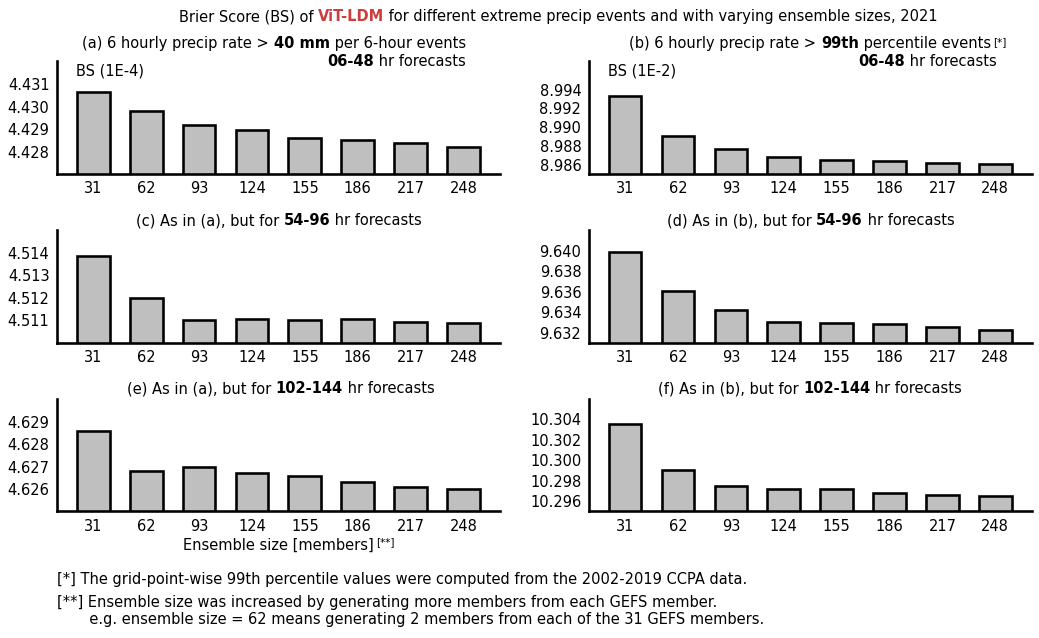

In [7]:
handles = []

fig = plt.figure(figsize=(13, 6), dpi=dpi_)
gs = gridspec.GridSpec(5, 3, height_ratios=[1, 0.5, 1, 0.5, 1], width_ratios=[1, 0.2, 1])

ax0 = plt.subplot(gs[0, 0])
ax1 = plt.subplot(gs[2, 0])
ax2 = plt.subplot(gs[4, 0])

ax3 = plt.subplot(gs[0, 2])
ax4 = plt.subplot(gs[2, 2])
ax5 = plt.subplot(gs[4, 2])

AX_left = [ax0, ax1, ax2]
AX_right = [ax3, ax4, ax5]

plt.subplots_adjust(0, 0, 1, 1, hspace=0.0, wspace=0.0)

keys = ['BS_06_54', 'BS_54_102', 'BS_102_144']

x_labels = ['31', '62', '93', '124', '155', '186', '217', '248']

x_ref = np.arange(len(x_labels))
width = 0.618

# sep = 4

for i, ax in enumerate(AX_left):
    ax = gu.ax_decorate(ax, left_flag=True, bottom_flag=True, bottom_spline=True)
    ax.grid(False)
    ax.ticklabel_format(useOffset=False)
    ax.set_xticks(x_ref)
    ax.set_xticklabels(x_labels)
    
#ax.tick_params(labelbottom=True)
for i, ax in enumerate(AX_right):
    ax = gu.ax_decorate(ax, left_flag=True, bottom_flag=True, bottom_spline=True)
    ax.grid(False)
    ax.ticklabel_format(useOffset=False)
    ax.set_xticks(x_ref)
    ax.set_xticklabels(x_labels)

AX_left[0].set_ylim([4.427, 4.432])
AX_left[0].set_yticks([4.428, 4.429, 4.430, 4.431])

AX_left[1].set_ylim([4.510, 4.515])
AX_left[1].set_yticks([4.511, 4.512, 4.513, 4.514])

AX_left[2].set_ylim([4.625, 4.630])
AX_left[2].set_yticks([4.626, 4.627, 4.628, 4.629])
AX_left[2].set_xlabel('Ensemble size [members]', fontsize=14)

AX_right[0].set_ylim([8.985, 8.997])
AX_right[0].set_yticks([8.986, 8.988, 8.990, 8.992, 8.994])

AX_right[1].set_ylim([9.631, 9.642])
AX_right[1].set_yticks([9.632, 9.634, 9.636, 9.638, 9.640])

AX_right[2].set_ylim([10.295, 10.306])
AX_right[2].set_yticks([10.296, 10.298, 10.300, 10.302, 10.304])


for i in range(3):
    AX_left[i].bar(x_ref, BS_40[:, i], width,
                   facecolor=color_main, edgecolor='k', linewidth=2.5)
    
    AX_right[i].bar(x_ref, BS_99[:, i], width,
                    facecolor=color_main, edgecolor='k', linewidth=2.5)

ax_w1 = fig.add_axes([0.02, 0.96, 0.08, 0.04])
ax_w1.text(0, 0.5, 'BS (1E-4)', ha='left', va='center', fontsize=14, transform=ax_w1.transAxes);

ax_w2 = fig.add_axes([0.545+0.02, 0.96, 0.08, 0.04])
ax_w2.text(0, 0.5, 'BS (1E-2)', ha='left', va='center', fontsize=14, transform=ax_w2.transAxes);

ax_title1 = fig.add_axes([0.0, 1+0.08, 1.0, 0.04])
title_len = 0.75; fontsize_list = [14,]*10
fontweight_list = ['normal', 'bold', 'normal', 'normal', 'normal', 'normal']
handles += gu.string_partial_format(fig, ax_title1, 0.5*(1-title_len), 0.5, 'left', 'center', 
                                    ['Brier Score (BS) of ',
                                     'ViT-LDM', ' for different extreme precip events and with varying ensemble sizes', 
                                     ', 2021'], ['k', colors_main[0], 'k', 'k'], fontsize_list, fontweight_list)

ax_title11 = fig.add_axes([0.0, 1.0+0.02, 0.455, 0.04])
title_len = 0.34; fontsize_list = [14,]*10
fontweight_list = ['normal', 'bold', 'normal', 'bold', 'normal']
handles += gu.string_partial_format(fig, ax_title11, 0.5*(0.455-title_len), 0.5, 'left', 'center', 
                                    ['(a) 6 hourly precip rate > ', '40 mm', ' per 6-hour events',], 
                                    ['k']*3, fontsize_list, fontweight_list)

ax_title12 = fig.add_axes([0.455-0.1775, 0.98, 0.1775, 0.04])
fontsize_list = [14,]*10
fontweight_list = ['bold', 'normal']
handles += gu.string_partial_format(fig, ax_title12, 0.0, 0.5, 'left', 'center', 
                                    ['06-48', ' hr forecasts'], 
                                    ['k']*2, fontsize_list, fontweight_list)

ax_title21 = fig.add_axes([0.545, 1.0+0.02, 0.455, 0.04])
title_len = 0.27; fontsize_list = [14,]*10
fontweight_list = ['normal', 'bold', 'normal', 'bold', 'normal']
handles += gu.string_partial_format(fig, ax_title21, 0.5*(0.455-title_len), 0.5, 'left', 'center', 
                                    ['(b) 6 hourly precip rate > ', '99th', ' percentile events'], 
                                    ['k']*3, fontsize_list, fontweight_list)

ax_title22 = fig.add_axes([1.0-0.1775, 0.98, 0.1775, 0.04])
fontsize_list = [14,]*10
fontweight_list = ['bold', 'normal']
handles += gu.string_partial_format(fig, ax_title22, 0.0, 0.5, 'left', 'center', 
                                    ['06-48', ' hr forecasts'], 
                                    ['k']*2, fontsize_list, fontweight_list)


ax_title3 = fig.add_axes([0.0, 2/3-0.04, 0.455, 0.04])
title_len = 0.1; fontsize_list = [14,]*10
fontweight_list = ['normal', 'bold', 'normal', 'bold', 'normal', 'bold', 'normal', 'bold', 'normal']
handles += gu.string_partial_format(fig, ax_title3, 0.5*(0.455-title_len), 0.5, 'left', 'center', 
                                    ['(c) As in (a), but for ', '54-96', ' hr forecasts'], 
                                    ['k']*3, fontsize_list, fontweight_list)

ax_title4 = fig.add_axes([0.545, 2/3-0.04, 0.455, 0.04])
title_len = 0.1; fontsize_list = [14,]*10
fontweight_list = ['normal', 'bold', 'normal', 'bold', 'normal', 'bold', 'normal', 'bold', 'normal']
handles += gu.string_partial_format(fig, ax_title4, 0.5*(0.455-title_len), 0.5, 'left', 'center', 
                                    ['(d) As in (b), but for ', '54-96', ' hr forecasts'], 
                                    ['k']*3, fontsize_list, fontweight_list)

ax_title5 = fig.add_axes([0.0, 1/3-0.08, 0.455, 0.04])
title_len = 0.14; fontsize_list = [14,]*10
fontweight_list = ['normal', 'bold', 'normal', 'bold', 'normal', 'bold', 'normal', 'bold', 'normal']
handles += gu.string_partial_format(fig, ax_title5, 0.5*(0.455-title_len), 0.5, 'left', 'center', 
                                    ['(e) As in (a), but for ', '102-144', ' hr forecasts'], 
                                    ['k']*3, fontsize_list, fontweight_list)

ax_title6 = fig.add_axes([0.545, 1/3-0.08, 0.455, 0.04])
title_len = 0.14; fontsize_list = [14,]*10
fontweight_list = ['normal', 'bold', 'normal', 'bold', 'normal', 'bold', 'normal', 'bold', 'normal']
handles += gu.string_partial_format(fig, ax_title6, 0.5*(0.455-title_len), 0.5, 'left', 'center', 
                                    ['(f) As in (b), but for ', '102-144', ' hr forecasts'], 
                                    ['k']*3, fontsize_list, fontweight_list)


ax_words1 = fig.add_axes([0, -0.175, 1.0, 0.04])
ax_words1.text(0, 1, '[*] The grid-point-wise 99th percentile values were computed from the 2002-2019 CCPA data.', 
              ha='left', va='top', fontsize=14, transform=ax_words1.transAxes);

ax_words2 = fig.add_axes([0, -0.265, 1.0, 0.08])
ax_words2.text(0, 1, '[**] Ensemble size was increased by generating more members from each GEFS member.\n       e.g. ensemble size = 62 means generating 2 members from each of the 31 GEFS members.', 
              ha='left', va='top', fontsize=14, transform=ax_words2.transAxes);

ax_ref1 = fig.add_axes([0.96, 1.015, 0.015, 0.04])
ax_ref1.text(0, 1, '[*]', ha='left', va='top', fontsize=10, transform=ax_ref1.transAxes);

ax_ref2 = fig.add_axes([0.3275, -0.097, 0.02, 0.04])
ax_ref2.text(0, 1, '[**]', ha='left', va='top', fontsize=10, transform=ax_ref2.transAxes);


ax_w1.set_axis_off()
ax_w2.set_axis_off()
ax_ref1.set_axis_off()
ax_ref2.set_axis_off()
ax_title1.set_axis_off()
ax_title11.set_axis_off()
ax_title12.set_axis_off()
ax_title21.set_axis_off()
ax_title22.set_axis_off()
ax_title3.set_axis_off()
ax_title4.set_axis_off()
ax_title5.set_axis_off()
ax_title6.set_axis_off()
ax_words1.set_axis_off()
ax_words2.set_axis_off()

if need_publish:
    # Save figure
    fig.savefig(fig_dir+'fig13_ensemble_size.png', format='png', **fig_keys)